In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from data.data import historic_btc_price

In [7]:
df = historic_btc_price

In [8]:
clean_df = df.filter(['day_of_week','date_clean','price','market_cap','total_volume'])
clean_df

,day_of_week,price,market_cap,total_volume
date_clean,,,,
2013-04-28,Sunday,86.889000,963625076.6999998,0.000000e+00
2013-04-29,Monday,93.069700,1032599014.53,0.000000e+00
2013-04-30,Tuesday,89.848100,997199354.0045329,0.000000e+00
2013-05-01,Wednesday,74.976700,832402569.9049999,0.000000e+00
2013-05-02,Thursday,68.290200,758413888.3198724,0.000000e+00
...,...,...,...,...
2020-07-24,Friday,7530.413954,138850222151.79285,2.117520e+10
2020-07-25,Saturday,7451.907052,137431134827.21165,2.798463e+10
2020-07-26,Sunday,7576.768447,139734074747.86703,2.871130e+10


In [9]:
clean_df['market_cap'] = clean_df['market_cap'].str.replace(' None','')
clean_df['market_cap'] = clean_df['market_cap'].str.replace(' ','')
clean_df['market_cap'] = pd.to_numeric(clean_df['market_cap'])

In [10]:
clean_df.info()
clean_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2647 entries, 2013-04-28 to 2020-07-27
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   day_of_week   2647 non-null   object 
 1   price         2647 non-null   float64
 2   market_cap    2578 non-null   float64
 3   total_volume  2647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 103.4+ KB


,day_of_week,price,market_cap,total_volume
date_clean,,,,
2013-04-28,Sunday,86.889000,9.636251e+08,0.000000e+00
2013-04-29,Monday,93.069700,1.032599e+09,0.000000e+00
2013-04-30,Tuesday,89.848100,9.971994e+08,0.000000e+00
2013-05-01,Wednesday,74.976700,8.324026e+08,0.000000e+00
2013-05-02,Thursday,68.290200,7.584139e+08,0.000000e+00
...,...,...,...,...
2020-07-24,Friday,7530.413954,1.388502e+11,2.117520e+10
2020-07-25,Saturday,7451.907052,1.374311e+11,2.798463e+10
2020-07-26,Sunday,7576.768447,1.397341e+11,2.871130e+10


## Monthly rolling mean for cryptocurrency price and total volume

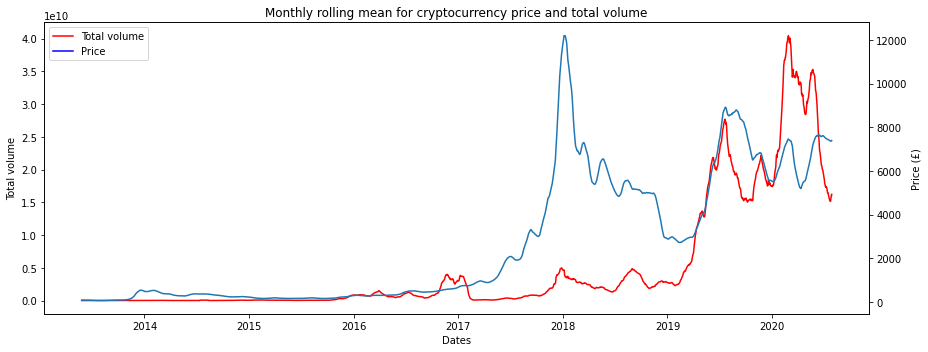

In [11]:
fig,ax1 = plt.subplots(figsize=[13,5])

ax2 = ax1.twinx()

data1 = clean_df[['price']].rolling(30).mean()
sns.lineplot(data=data1, ax=ax2, color='b')
data2 = clean_df['total_volume'].rolling(30).mean()
sns.lineplot(data=data2, ax=ax1,color='r')


plt.title('Monthly rolling mean for cryptocurrency price and total volume')
ax1.set_xlabel('Dates')
ax1.set_ylabel('Total volume')
ax2.set_ylabel('Price (£)')
plt.xticks(rotation=40)
line1 = Line2D([0,1],[0,1],linestyle='-', color='r')
line2 = Line2D([0,1],[0,1],linestyle='-', color='b')
plt.legend((line1, line2), ('Total volume', 'Price'), loc=2)
fig.tight_layout();

In [12]:
# correlation between total_volume and price
clean_df['total_volume'].corr(df['price'])

0.6515670564419865

Looking at the graph, there does not seem to be a strong relationship between cryptocurrency price and total volume, especially before 2017. The correlation coefficient of 0.65 shows that there is a moderate relationship between the two variables. This may be due to the fact that the volume then is much smaller than the numbers it garners now, therefore it was not as popular yet. 

There are times when the total volume increases and this has no immediate impact on the price. For example, in the end of 2017 and in the second half of 2018. Although, the former had no immediate effect, the 4 months of higher than usual volume activity may have helped with the exponential growth for the year 2017.

There are times when the total volume increases and price follows the same trend. This effect can be seen at the beginning of 2018.

## Monthly rolling mean for cryptocurrency price and total volume

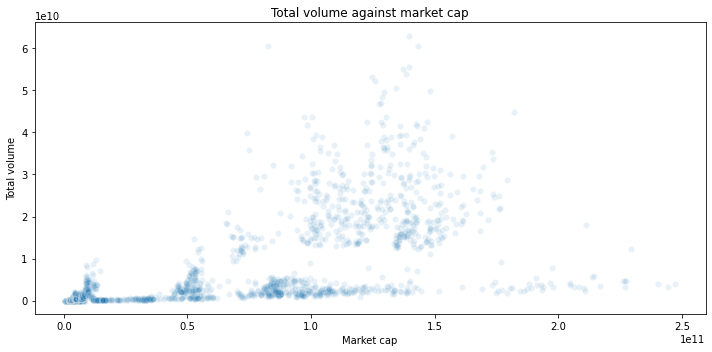

In [13]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=clean_df, x='market_cap', y='total_volume', alpha=.1)
plt.title('Total volume against market cap')
plt.xlabel('Market cap')
plt.ylabel('Total volume')
plt.tight_layout();

Most of the points fall under £60 billion market cap and below 10 billion total volume. This suggests that when they had a lower market cap they were not traded as much. This is true as this is before 2017.

It seems that when market cap is very high it is not traded as much.

## Price against market cap

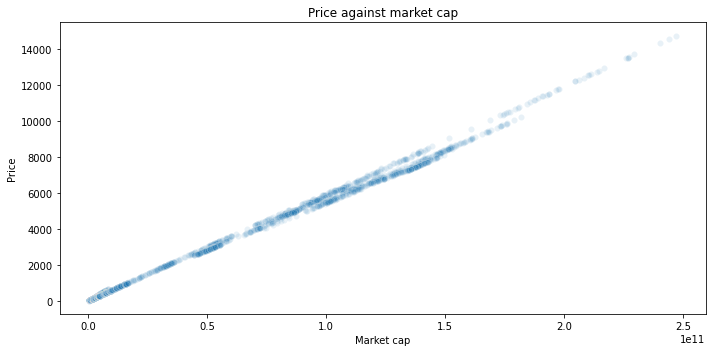

In [14]:
plt.figure(figsize=[10,5])
sns.scatterplot(data=clean_df, x='market_cap', y='price', alpha=0.1)
plt.title('Price against market cap')
plt.xlabel('Market cap')
plt.ylabel('Price')
plt.tight_layout();

In [15]:
# correlation between market cap and price
clean_df['market_cap'].corr(clean_df['price'])

0.998878634635438

Most of the points fall under £150 billion market cap. There is also a very strong positive relationship between price and market cap, as the correlation coefficient practically equals 1.

## Market cap divided volume

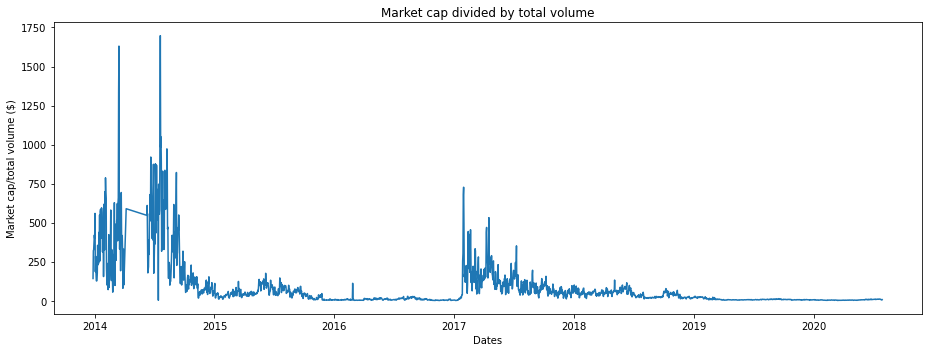

In [16]:
plt.figure(figsize=[13,5])
data2 = clean_df
data2 = data2.groupby('day_of_week').sum().reset_index()

data2 = clean_df['market_cap']/clean_df['total_volume']
sns.lineplot(data=data2 )

plt.title('Market cap divided by total volume')
plt.xlabel('Dates')
plt.ylabel('Market cap/total volume ($)')
plt.tight_layout()

The graph is extremely erratic. When the market cap/total volume is high it means that the market for cryptocurrency is worth a lot more than it is being traded. This could be seen as overvalued. When the market cap/total volume is low it means that the market for cryptocurrency is worth less and more people trading it. This could be seen as undervalued. 

It has been "undervalued" twice and is currently in an "undervalued" state, so the price may increase soon.